In [15]:
import pandas as pd
import matplotlib.pyplot as plt

#### Importing dataset

In [16]:
mall_cust_df = pd.read_csv("Mall_Customers - Mall_Customers.csv")
mall_cust_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19.0,15.0,39
1,2,Male,21.0,15.0,81
2,3,Female,20.0,16.0,6
3,4,Female,23.0,16.0,77
4,5,Female,31.0,17.0,40


#### Features

In [17]:
mall_cust_df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

### Null values

In [18]:
mall_cust_df.isnull().sum()

CustomerID                0
Gender                    1
Age                       1
Annual Income (k$)        1
Spending Score (1-100)    0
dtype: int64

In [19]:
for column in mall_cust_df.columns:
    if mall_cust_df[column].dtype=='object':
        mall_cust_df[column] = mall_cust_df[column].fillna(mall_cust_df[column].mode()[0])
        print(column)
    else:
        mall_cust_df[column] = mall_cust_df[column].fillna(mall_cust_df[column].mean())

Gender


In [20]:
mall_cust_df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

## Distribution of Age

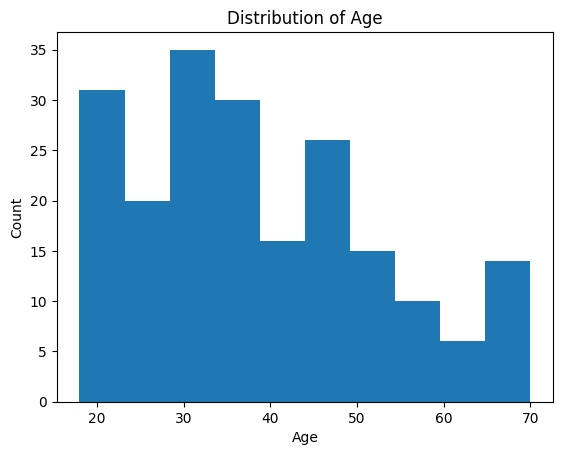

In [21]:
plt.hist(mall_cust_df['Age'])
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

# correlation

In [22]:
mall_cust_df['Gender'] = mall_cust_df['Gender'].map({'Male': 0, 'Female': 1})
print("Correlation: \n", mall_cust_df.corr()['Spending Score (1-100)'])

Correlation: 
 CustomerID                0.006872
Gender                    0.065682
Age                      -0.323599
Annual Income (k$)        0.010274
Spending Score (1-100)    1.000000
Name: Spending Score (1-100), dtype: float64


### Cust ID has highest corr

### converting gender into numerical values

In [23]:
# mall_cust_df['Gender'] = mall_cust_df['Gender'].map({'Male':1,'Female':0})

In [24]:
mall_cust_df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19.000000,15.000000,39
1,2,0,21.000000,15.000000,81
2,3,1,20.000000,16.000000,6
3,4,1,23.000000,16.000000,77
4,5,1,31.000000,17.000000,40
...,...,...,...,...,...
198,199,0,32.000000,137.000000,18
199,200,0,30.000000,137.000000,83
200,201,1,27.000000,61.316832,28
201,202,0,38.747525,137.000000,19


# Elbow method

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

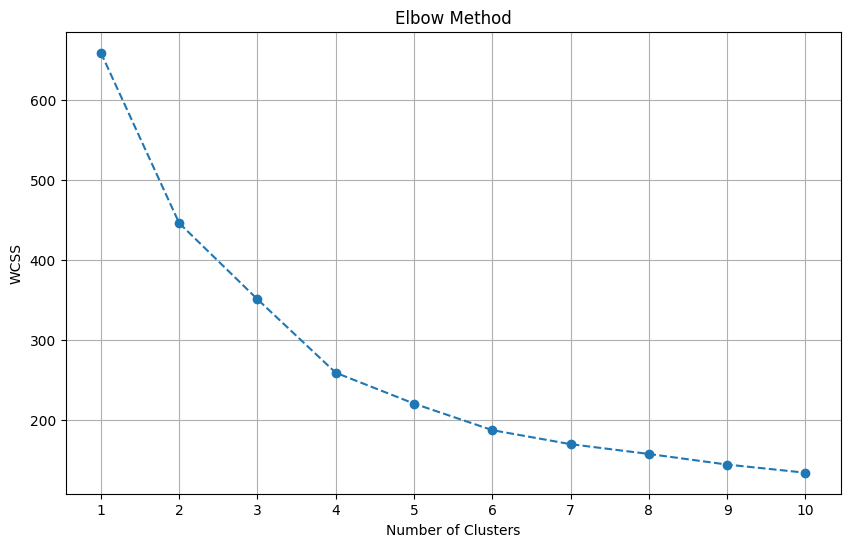

In [25]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

scaled_df = mall_cust_df.copy()
scaler = StandardScaler()
scaled_df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']] = scaler.fit_transform(
    mall_cust_df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_df.drop('CustomerID',axis=1))
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

# Average income

In [27]:
print("Average annual income: ",mall_cust_df['Annual Income (k$)'].mean())

Average annual income:  61.31683168316832


In [28]:
# Average spending score of male

In [29]:


male_avg_spending = mall_cust_df[mall_cust_df['Gender'] == 0]['Spending Score (1-100)'].mean()
print("Average spending score of male customers:", male_avg_spending)


Average spending score of male customers: 48.17977528089887


## which cluster has highest average income and spending score

In [31]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3,random_state=42)
mall_cust_df['Cluster'] = kmeans.fit_predict(mall_cust_df)

# Calculate average income and spending score for each cluster
cluster_avg = mall_cust_df.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean()

highest_avg_cluster = cluster_avg.sum(axis=1).idxmax()

print("Cluster with highest average income and spending score:", highest_avg_cluster)


Cluster with highest average income and spending score: 2


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# Percentage of customers in cluster 1

In [40]:
cluster_1_count = mall_cust_df[mall_cust_df['Cluster'] == 0].shape[0]
total_customers = mall_cust_df.shape[0]
percentage_cluster_1 = (cluster_1_count / total_customers) * 100

print("Percentage of customers in cluster 1:", percentage_cluster_1)


Percentage of customers in cluster 1: 34.97536945812808


## Most freq age in cluster 2

In [39]:
cluster_2_df = mall_cust_df[mall_cust_df['Cluster'] == 1]
most_freq_age = cluster_2_df['Age'].mode()[0]
print("Most frequent age in cluster 2:", most_freq_age)


Most frequent age in cluster 2: 35.0


## Average Income in cluster 3

In [38]:
average_income_cluster_3 = mall_cust_df[mall_cust_df['Cluster'] == 2]['Annual Income (k$)'].mean()
print("Average income in cluster 3:", average_income_cluster_3)


Average income in cluster 3: 90.91517659228609


# Count of value in each cluster

In [33]:
mall_cust_df['Cluster'].value_counts()

Cluster
0    71
2    67
1    65
Name: count, dtype: int64

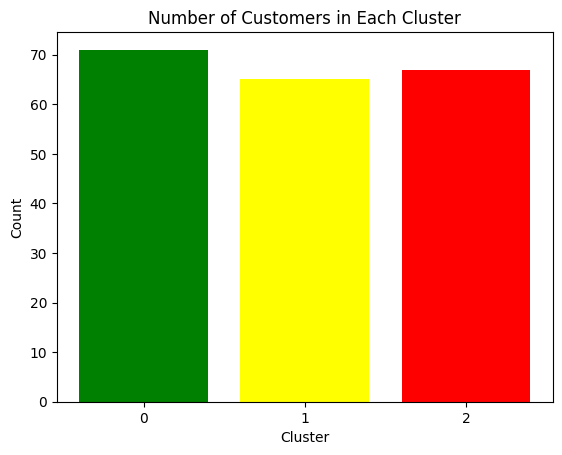

In [42]:

cluster_counts = mall_cust_df['Cluster'].value_counts()

plt.bar(cluster_counts.index, cluster_counts.values, color=['green', 'red', 'yellow'])
plt.xticks(range(3))
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Number of Customers in Each Cluster')
plt.show()


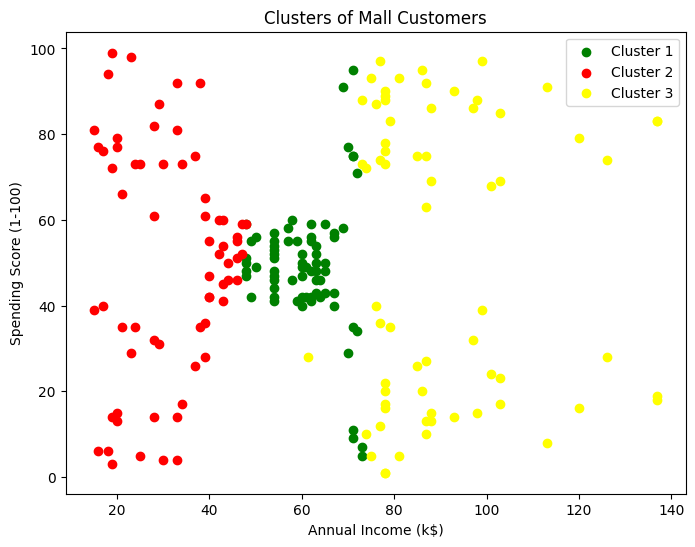

In [35]:

plt.figure(figsize=(8, 6))

colors = ['green', 'red', 'yellow']

for i in range(3):
  cluster_data = mall_cust_df[mall_cust_df['Cluster'] == i]
  plt.scatter(cluster_data['Annual Income (k$)'], cluster_data['Spending Score (1-100)'], c=colors[i], label='Cluster {}'.format(i + 1))

plt.title('Clusters of Mall Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()
